In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
!pip install openpyxl

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_excel('/content/drive/MyDrive/Sistemas_de_IA/datasets/BBDD.xlsx')

In [6]:
#df = pd.read_excel('BBDD.xlsx')

In [7]:
df.head()

,review_en,review_es,sentiment,sentimiento
0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo


In [8]:
df

,review_en,review_es,sentiment,sentimiento
0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo
...,...,...,...,...
49995,I thought this movie did a down right good job...,Pensé que esta película hizo un buen trabajo a...,positive,positivo
49996,"Bad plot, bad dialogue, bad acting, idiotic di...","Mala parcela, mal diálogo, mala actuación, dir...",negative,negativo
49997,I am a Catholic taught in parochial elementary...,Soy católica enseñada en escuelas primarias pa...,negative,negativo
49998,I'm going to have to disagree with the previou...,Voy a tener que estar en desacuerdo con el com...,negative,negativo


In [9]:
df = df[['sentimiento', 'review_es']].copy()

In [10]:
df.head()

,sentimiento,review_es
0,positivo,Uno de los otros críticos ha mencionado que de...
1,positivo,Una pequeña pequeña producción.La técnica de f...
2,positivo,Pensé que esta era una manera maravillosa de p...
3,negativo,"Básicamente, hay una familia donde un niño peq..."
4,positivo,"El ""amor en el tiempo"" de Petter Mattei es una..."


<Axes: >

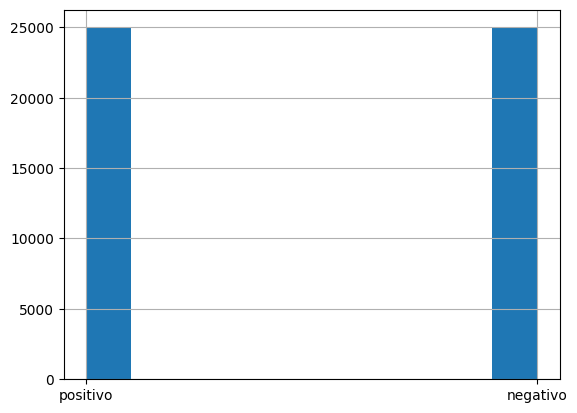

In [11]:
df['sentimiento'].hist()

In [12]:
target_map = {'positivo': 1, 'negativo': 0}
df['target'] = df['sentimiento'].map(target_map)

In [13]:
df.head()

,sentimiento,review_es,target
0,positivo,Uno de los otros críticos ha mencionado que de...,1
1,positivo,Una pequeña pequeña producción.La técnica de f...,1
2,positivo,Pensé que esta era una manera maravillosa de p...,1
3,negativo,"Básicamente, hay una familia donde un niño peq...",0
4,positivo,"El ""amor en el tiempo"" de Petter Mattei es una...",1


In [14]:
df_train, df_test = train_test_split(df)

In [15]:
df_train

,sentimiento,review_es,target
19626,positivo,"Tim Burton es, en esencia, un fabricante de ci...",1
22417,negativo,"Si Andrei Tarkovsky hubiera sido un truco, hab...",0
21663,negativo,Esta película es tan mala y empeora en todas l...,0
13531,negativo,Observó hace meses en Netflix instantáneamente...,0
3392,negativo,¡Ergh!3 cosas que necesita una película: un bu...,0
...,...,...,...
40862,positivo,"Cuando vio por primera vez esta película, pens...",1
33573,negativo,Tuve que ver esto en la escuela.Y para resumir...,0
1391,positivo,"No mires esta película mientras, o poco despué...",1
42496,positivo,¡No me importa cuántas malas críticas se obtie...,1


In [16]:
df_test

,sentimiento,review_es,target
35678,negativo,Su capacidad para disfrutar de las cenizas del...,0
45741,positivo,"Diga lo que quiere sobre Andy Milligan, pero s...",1
5178,positivo,Un soporte de vida es una pieza de película re...,1
29232,negativo,I am a pretty much a sucker for those Ghost Hu...,0
7167,negativo,Judy Holliday golpeó el oro en 1950 con la ver...,0
...,...,...,...
3887,positivo,Disfruté mucho esta película.Me pareció muy en...,1
16976,negativo,Terminé observando toda esta película (muy lar...,0
21532,positivo,Nunca olvidaré el efecto absolutamente absorbe...,1
32421,negativo,"Esta es, con mucho, la peor adaptación de Jane...",0


In [17]:
vectorizer = TfidfVectorizer(max_features=2000)

In [18]:
X_train = vectorizer.fit_transform(df_train['review_es'])

In [19]:
X_train

<37500x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 3463532 stored elements in Compressed Sparse Row format>

In [20]:
X_test = vectorizer.transform(df_test['review_es'])
X_test

<12500x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 1156230 stored elements in Compressed Sparse Row format>

In [21]:
Y_train = df_train['target']
Y_test = df_test['target']

In [22]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8791466666666666
Test acc: 0.86536


In [23]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [24]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.8702286 , 0.1297714 ],
       [0.11187801, 0.88812199]])

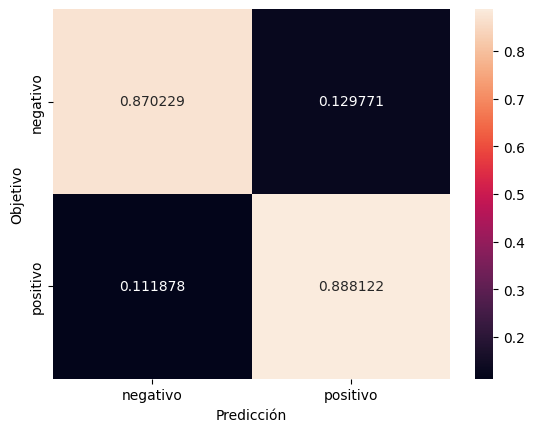

In [25]:
def plot_cm(cm):
    classes = ['negativo', 'positivo']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Objetivo")

plot_cm(cm)

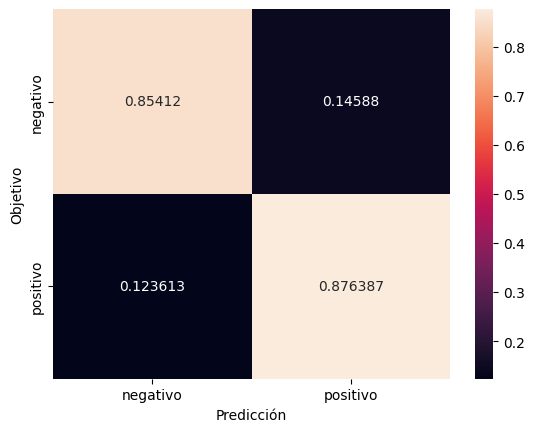

In [26]:
cm = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm)

In [27]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'tim': 1812,
 'es': 622,
 'en': 584,
 'un': 1869,
 'de': 438,
 'cine': 302,
 'del': 459,
 'carácter': 269,
 'con': 350,
 'el': 569,
 'por': 1435,
 'estilo': 681,
 'sobre': 1693,
 'la': 1022,
 'lo': 1066,
 'largo': 1027,
 'su': 1722,
 'carrera': 267,
 'sin': 1683,
 'embargo': 578,
 'siendo': 1669,
 'tan': 1753,
 'yo': 1981,
 'como': 337,
 'muchos': 1200,
 'espectadores': 653,
 'todas': 1818,
 'las': 1028,
 'que': 1513,
 'se': 1620,
 'pueden': 1501,
 'encontrar': 592,
 'muchas': 1198,
 'sus': 1742,
 'películas': 1365,
 'han': 852,
 'son': 1703,
 'millones': 1160,
 'dólares': 556,
 'arte': 131,
 'casi': 271,
 'para': 1337,
 'mí': 1220,
 'ver': 1907,
 'espíritu': 665,
 'segunda': 1632,
 'una': 1870,
 'mediocre': 1136,
 'especialmente': 650,
 'cuando': 410,
 'audiencia': 154,
 'encuentran': 595,
 '15': 6,
 'años': 165,
 'los': 1076,
 'batman': 181,
 'deberían': 443,
 'haber': 830,
 'sido': 1667,
 'emociones': 581,
 'hecho': 864,
 'muy': 1216,
 'caras': 263,
 'realmente': 1542,
 'había': 84

In [28]:
model.coef_[0]

array([-0.11854663,  1.91779664,  0.2101079 , ...,  0.32661401,
       -0.99828292, -2.22583279])

In [29]:
corte = 4

print("Palabras más positivas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > corte:
        print(word, weight)

Palabras más positivas:
perfecto 4.269418753739748
brillante 4.053731159996338
gran 4.251797803440863
definitivamente 4.071074707667923
increíble 4.289100162024663
encantó 4.982941435569337
excelente 7.8247801562336425
mejores 4.173830774936603
hilarante 4.1471711690770805
hoy 4.5733221626237865
maravillosa 4.2801305659382445
excelentes 4.385717310678854
disfruté 4.143917855465002


In [30]:
print("Palabras más negativas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -corte:
        print(word, weight)

Palabras más negativas:
no -4.490143915460949
decepción -5.02927876074776
mal -5.79515419478702
basura -5.026177222216496
mala -7.37278085138133
pobre -5.70703361268872
peor -10.073274488071652
minutos -4.208116953344905
nada -4.189498999113247
terrible -7.349274957481255
aburrido -6.636425027634289
aburrida -6.680673614326222
malo -4.498669953053609
horrible -9.305491716567744
peores -7.0625027769177535
desafortunadamente -4.860487403661558
estúpida -4.190208695928035
decepcionante -4.839524512512336


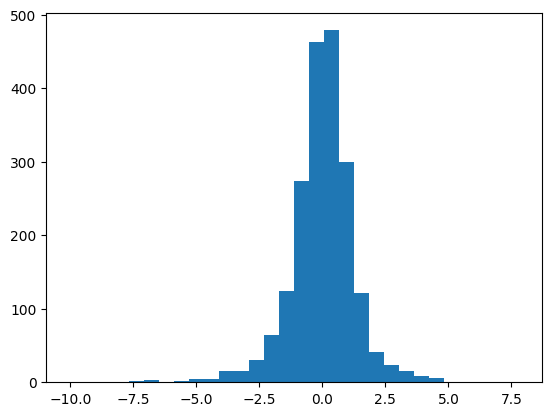

In [31]:
plt.hist(model.coef_[0], bins=30);

In [32]:
prueba = ["estuvo muy entretenida la película", "estuvo terrible la película, me aburrí mucho", "no la recomiendo", "la"]

# Transformar la entrada con el vectorizador
x = vectorizer.transform(prueba)



In [33]:
# Predecir con el modelo
P = model.predict(x)

In [34]:
# Obtener las clases del modelo
clases = model.classes_

In [35]:
# Mostrar la clase predicha
for i in range (len(prueba)):
    if clases[P[i]] == 0:
        print(f"el Comentario: '{prueba[i]}' es: Negativo")
    else:
        print(f"el Comentario: '{prueba[i]}' es: Positivo")

el Comentario: 'estuvo muy entretenida la película' es: Positivo
el Comentario: 'estuvo terrible la película, me aburrí mucho' es: Negativo
el Comentario: 'no la recomiendo' es: Positivo
el Comentario: 'la' es: Positivo


# Multiclases - TP Final


In [36]:
#df = pd.read_csv('Twitter_Data.csv')

In [37]:
df=pd.read_csv('/content/drive/MyDrive/Sistemas_de_IA/datasets/Twitter_Data.csv')

In [39]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,Negativo
1,talk all the nonsense and continue all the dra...,Neutro
2,what did just say vote for modi welcome bjp t...,Positivo
3,asking his supporters prefix chowkidar their n...,Positivo
4,answer who among these the most powerful world...,Positivo
...,...,...
162963,why these 456 crores paid neerav modi not reco...,Negativo
162964,dear rss terrorist payal gawar what about modi...,Negativo
162965,did you cover her interaction forum where she ...,Neutro
162966,there big project came into india modi dream p...,Neutro


<Axes: >

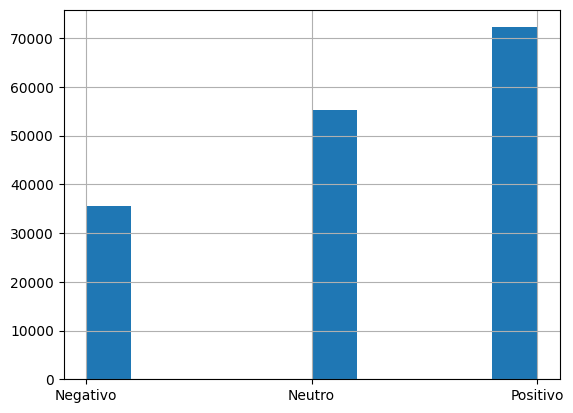

In [40]:
df['category'].hist()

In [41]:
target_map = {'Positivo': 2, 'Negativo': 0, 'Neutro': 1}
df['target'] = df['category'].map(target_map)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c6373885-1408-4db2-91db-dea3a1853811' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [42]:
df.head()

,clean_text,category,target
0,when modi promised “minimum government maximum...,Negativo,0
1,talk all the nonsense and continue all the dra...,Neutro,1
2,what did just say vote for modi welcome bjp t...,Positivo,2
3,asking his supporters prefix chowkidar their n...,Positivo,2
4,answer who among these the most powerful world...,Positivo,2


In [43]:
df_train, df_test = train_test_split(df)

In [44]:
df_train

,clean_text,category,target
36277,bjp want modi not mahajan fight from indore,Neutro,1
119333,why dont this election fighting issues develop...,Positivo,2
26200,true that don’ blame only modi,Positivo,2
37841,what meant was simple enough iaf patriotic for...,Positivo,2
77627,should not thankful narendra modi should thank...,Positivo,2
...,...,...,...
154621,modi has given highest allocations mnrega may ...,Neutro,1
49731,congratulation and every singal citizen our co...,Positivo,2
91829,will remonetise what modi demonetised says rah...,Neutro,1
79410,political scumbag who has fallen from great he...,Positivo,2


In [45]:
df_test

,clean_text,category,target
4515,dangerous move loot india and all effort modi ...,Negativo,0
92299,another countries what happened why you blame ...,Neutro,1
48202,you should say thanks drdo and modi government,Positivo,2
155255,more surprising modi his media did not utter s...,Positivo,2
35236,modi can’ trusted,Neutro,1
...,...,...,...
10259,after the superviral mahagathbandhan whatsapp ...,Negativo,0
4072,nirav modi got loans from banks during upa era...,Neutro,1
84773,salute all the stakeholders wonder missionshak...,Positivo,2
90472,this type framing problematic because assumes ...,Negativo,0


In [46]:
vectorizer = TfidfVectorizer(max_features=2000)

In [47]:
X_train = vectorizer.fit_transform(df_train['clean_text'])

In [48]:
X_train

<122226x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 1763240 stored elements in Compressed Sparse Row format>

In [49]:
X_test = vectorizer.transform(df_test['clean_text'])
X_test

<40742x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 589409 stored elements in Compressed Sparse Row format>

In [50]:
Y_train = df_train['target']
Y_test = df_test['target']

In [51]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8972068136075794
Test acc: 0.891193363114231


In [52]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [53]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.76012073, 0.11956235, 0.12031692],
       [0.00853485, 0.9772404 , 0.01422475],
       [0.03613303, 0.06087309, 0.90299388]])

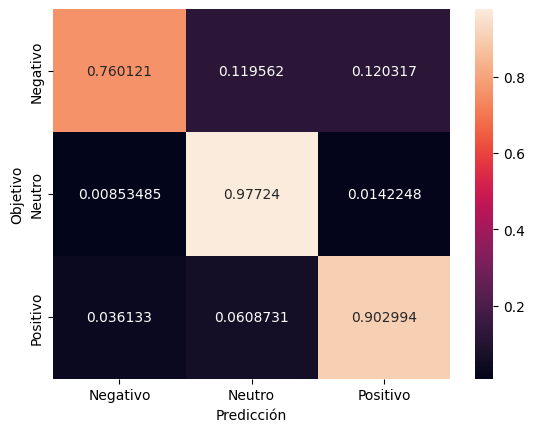

In [54]:
def plot_cm(cm):
    classes = ['Negativo', 'Neutro', 'Positivo']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Objetivo")

plot_cm(cm)

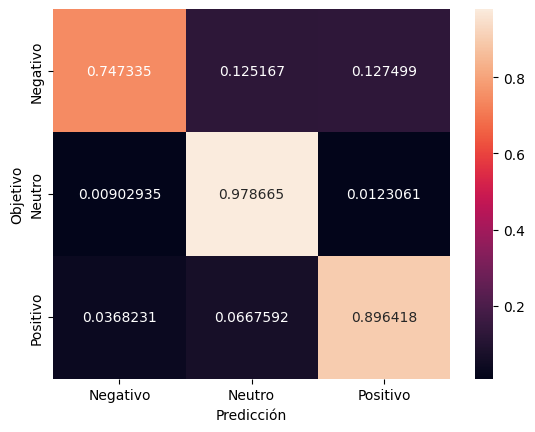

In [55]:
cm = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm)

In [56]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'bjp': 228,
 'want': 1893,
 'modi': 1151,
 'not': 1223,
 'fight': 653,
 'from': 701,
 'why': 1938,
 'dont': 527,
 'this': 1771,
 'election': 567,
 'fighting': 654,
 'issues': 906,
 'development': 501,
 'water': 1903,
 'electricity': 570,
 'road': 1500,
 'health': 801,
 'education': 560,
 'inflation': 881,
 'gst': 763,
 'opposition': 1261,
 'keeps': 950,
 'rafale': 1416,
 'pulwama': 1403,
 'balakot': 172,
 'nirav': 1212,
 'the': 1755,
 'made': 1069,
 'all': 80,
 'more': 1160,
 'india': 876,
 'because': 191,
 'true': 1814,
 'that': 1753,
 'don': 525,
 'blame': 231,
 'only': 1249,
 'what': 1921,
 'meant': 1110,
 'was': 1897,
 'simple': 1607,
 'enough': 583,
 'iaf': 851,
 'force': 680,
 'strike': 1682,
 'cong': 381,
 'others': 1266,
 'anti': 110,
 'national': 1191,
 'view': 1866,
 'questioning': 1412,
 'own': 1273,
 'forces': 682,
 'stand': 1659,
 'with': 1948,
 'who': 1933,
 'you': 1989,
 'period': 1304,
 'should': 1592,
 'narendra': 1188,
 'thanks': 1752,
 'those': 1772,
 'scientists': 

In [57]:
model.coef_[0]

array([ 0.1350892 ,  0.00806435, -0.8258369 , ...,  0.09740242,
        0.14986625,  0.15732999])

In [58]:
corte_positivas = 2
corte_negativas = 6

print("Palabras más negativas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > corte_negativas:
        print(word, weight)

Palabras más negativas:
game 6.545904571011467
failed 8.326847448506483
poor 9.57022137195702
down 7.535221257724317
idiot 7.777292798114159
blind 6.041513288321601
bad 8.653291954686923
black 6.2640666786043315
sorry 6.602187736025072
wrong 7.948565320304712
hate 11.465637302570503
behind 7.029539329368871
sad 6.09608345511172
fake 8.388590181694822
desperate 6.835381639719621
other 8.291068675655614
failure 6.559864920351781
false 6.4215856359031855
corrupt 7.114180846444745
mean 6.645555823839031
common 6.45477834198194
hard 7.202074351728909
bloody 6.792650240246283
past 6.11782519582598
least 6.053109155145724
idiots 6.7757551095458926
stupid 8.982478367386863
due 6.14819361570558
moron 6.4807457199545935
dangerous 7.325854119183835
afraid 6.594867578781195
evil 6.465379758859129
worst 8.91473095079138
impossible 6.27496807685198
pathetic 6.782061124047348
base 6.348131422793807


In [59]:
print("Palabras más positivas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -corte_positivas:
        print(word, weight)


Palabras más positivas:
more -4.415775472057453
own -4.793222212720746
brilliant -2.4473836055691818
better -3.725949829806036
win -3.950013884994726
great -5.282970957957788
most -3.2906673074287855
good -3.2332037974805465
latest -2.011266544444274
successful -2.832925173797615
proud -4.68756403144812
kind -3.053193209837565
nice -2.075681898895814
winning -2.1698271938856326
best -6.931692690786872
many -4.8478169793787735
successfully -3.73819542828179
greatest -2.4796056087583045
love -2.9719094523766962
beloved -2.747309442794718
brave -2.5710108872971054
top -2.9202062685369032
lol -4.530088883496599
interesting -2.3708129436754266
welcome -2.4350464704096493
honest -2.7451557979762207
perfect -2.667714643138608
excellent -2.7597892397415897
innocent -2.523943843975491
wise -2.4560782860944466


In [60]:
print("Palabras más neutras:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if -1 < weight < 4:
        print(word, weight)

Palabras más neutras:
bjp 0.2259437748047028
want -0.023682561342680538
modi -0.9255848232479607
not 1.3546589641745164
fight -0.13362791446502822
from 0.11476303164433059
why 0.35054030264260855
dont 0.2057499959957001
this 0.49874945364781914
election -0.11207756600044837
fighting 0.03945993910291146
issues 0.15767526530584297
development -0.11296661681837487
water 0.23412532700068975
electricity -0.020904856905926184
road 0.15350551485173064
health 0.2533410214192841
education -0.15915386946371082
inflation 0.5261177754629357
gst 1.0460277254972632
opposition 0.38564796069103147
keeps 1.163343398549353
rafale 0.2923086653879969
pulwama -0.16708584701762783
balakot -0.2474502219520266
nirav 0.15617094125065842
the 0.3665253866697414
made 0.2885608814572291
all 0.16502637593417002
india -0.00029959342887622876
because 0.38981505637586045
true -0.18826591366191986
that 0.49975906161935874
don 0.43988689343871973
blame 0.3351106920470425
only -0.19740096378518077
what 0.1219567826667315

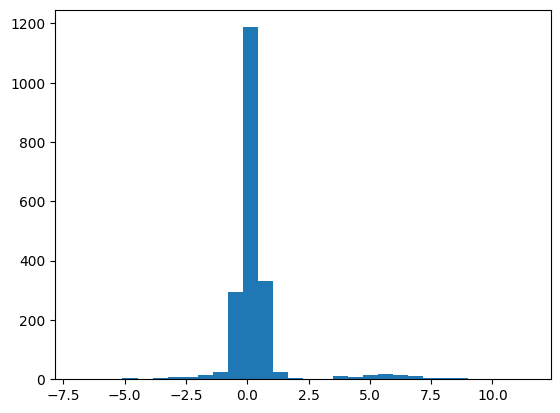

In [61]:
plt.hist(model.coef_[0], bins=30);

In [62]:
prueba = ["Thrilling and action-packed", "Outstanding performances and visual effects", "Predictable and unoriginal",
          "Disappointing performances, confusing script","Moderate performances, mixed reviews", "Explores themes of identity and belonging",
          "Bad acting, stupid storyline, disappointing", "Utterly bad film, painfully stupid.","A film filled with love and wisdom",
          "I appreciated the wise storytelling and heartfelt love" ]

# Transformar la entrada con el vectorizador
x = vectorizer.transform(prueba)



In [63]:
# Predecir con el modelo
P = model.predict(x)

In [64]:
# Obtener las clases del modelo
clases = model.classes_

In [65]:
# Mostrar la clase predicha
for i in range (len(prueba)):
    if clases[P[i]] == 0:
        print(f"el Comentario: '{prueba[i]}' es: Negativo")
    elif clases[P[i]] == 1:
        print(f"el Comentario: '{prueba[i]}' es: Neutro")
    else:
        print(f"el Comentario: '{prueba[i]}' es: Positivo")

el Comentario: 'Thrilling and action-packed' es: Positivo
el Comentario: 'Outstanding performances and visual effects' es: Neutro
el Comentario: 'Predictable and unoriginal' es: Neutro
el Comentario: 'Disappointing performances, confusing script' es: Neutro
el Comentario: 'Moderate performances, mixed reviews' es: Neutro
el Comentario: 'Explores themes of identity and belonging' es: Neutro
el Comentario: 'Bad acting, stupid storyline, disappointing' es: Negativo
el Comentario: 'Utterly bad film, painfully stupid.' es: Negativo
el Comentario: 'A film filled with love and wisdom' es: Positivo
el Comentario: 'I appreciated the wise storytelling and heartfelt love' es: Positivo
